<a href="https://colab.research.google.com/github/raghzzzspace/Machine-Learning-Projects/blob/main/Kepler_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                608       
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dense_74 (Dense)            (None, 4)                 36        
                                                                 
 dense_75 (Dense)            (None, 1)                 5         
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
108/108 [==============================] - 1s 3ms/step - loss: 0.6874 - accuracy: 0.5601
Test Loss: 0.6874273419380188
Test Accuracy: 0.5601274967193604


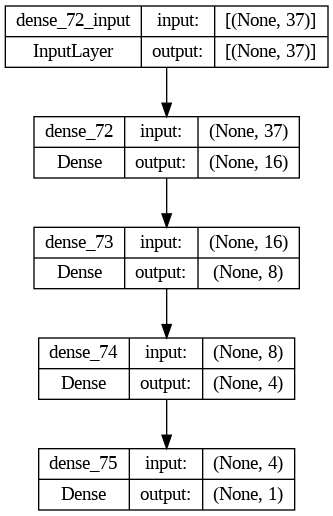

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

file_path='/content/kepler_dataset.csv'
df=pd.read_csv(file_path,header=0) #wecan directly use column names with header=0
#print(df.shape) #6999 data points 39 feature columns
#print(df.head(n=10)) #print few rows of starting default 5
df=df.loc[:6900]

l=['ExoplanetCandidate','ExoplanetConfirmed']
X=df.drop(l,axis=1)  # Features (excluding the target column)
y=df['ExoplanetCandidate']  # Target variable


#first we split then we normalize to prevent data leakage and increase accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3500/7000, random_state=42)


#Normalizatiom
scaler=StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)


#Building Neural Network Model
model=Sequential()

# Add input layer
model.add(Dense(units=16,activation='sigmoid', input_shape=(X_train_normalized.shape[1],)))

# Add hidden layers
model.add(Dense(units=8,activation='sigmoid'))
model.add(Dense(units=4,activation='sigmoid'))

# Add the output layer
model.add(Dense(units=1,activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()


# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_normalized, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

